In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = 2.5
k = 1.0

In [3]:
def ricker(x, r, k):
    return x*np.exp(r*(1-x/k))

In [4]:
def run(f, x0, n, args):
    r,k = args
    xs = [x0]
    for _ in range(n):
        xs.append(f(xs[-1], r, k))
    return xs

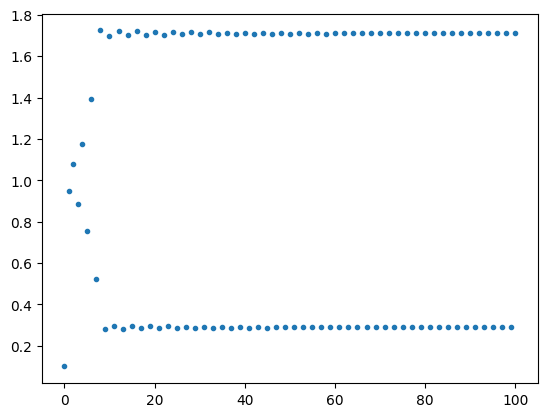

In [5]:
xs = run(ricker, 0.1, 100, (r,k))
plt.plot(xs, '.')

(0.0, 4.0)

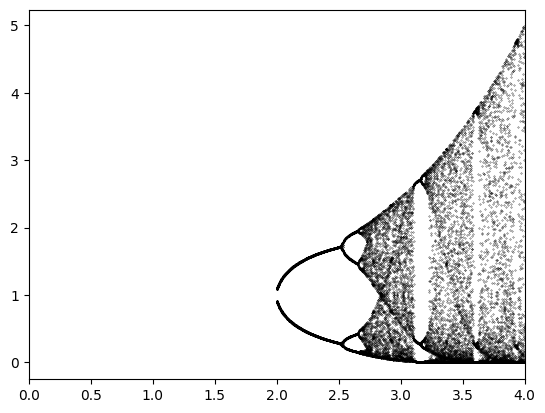

In [6]:
for r in np.linspace(2,4,2000):
    xs = run(ricker, 0.1, 100, (r,k))[-10:]
    plt.plot([r]*len(xs), xs, 'k.', ms=0.5)
plt.xlim(0, 4)

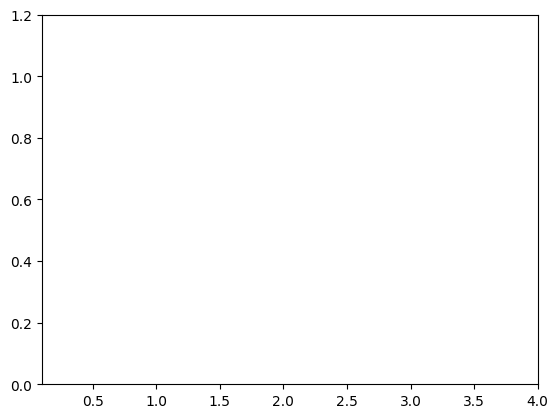

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(0.1, 4), ylim=(0, 1.2))

line, = ax.plot([], [], '.' ,ms=2)

ts = np.linspace(0.1, 4, 200)
k = 1.0

def init():
    line.set_data([], [])
    return line,

def animate(r):
    xs = run(ricker, 0.1, len(ts)-1, (r,k))
    r_values = [r] * len(xs)
    
    line.set_data(r_values, xs)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=ts)


In [8]:
from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=30)
anim.save("vertical_ricker.gif", writer=writer)

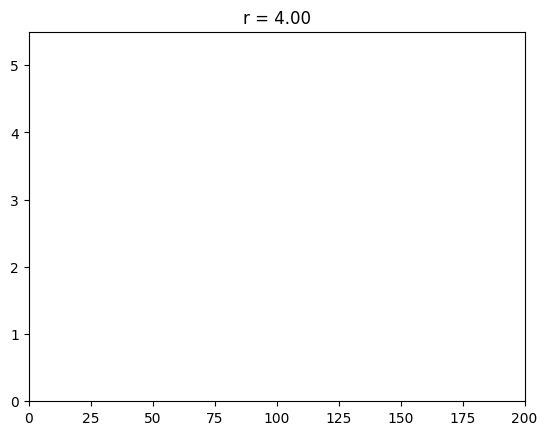

In [9]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 200), ylim=(0, 5.5))

line, = ax.plot([], [], '.' ,ms=2)

rs = np.linspace(0.1, 4, 200)
k = 1.0

def init():
    line.set_data([], [])
    return line,

def animate(r):
    ax.set_title(f"r = {r:.2f}")
    xs = run(ricker, 0.1, len(rs)-1, (r,k))
    r_values = np.linspace(0,len(rs)-1,len(rs)) 
    line.set_data(r_values, xs)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=rs)


from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=20)
anim.save("horizontal_ricker.gif", writer=writer)

In [10]:
def detect_period(xs, tol=1e-3):
    for i in range(1, len(xs)):
        if abs(xs[i] - xs[0]) < tol:
            return i
    return '?'

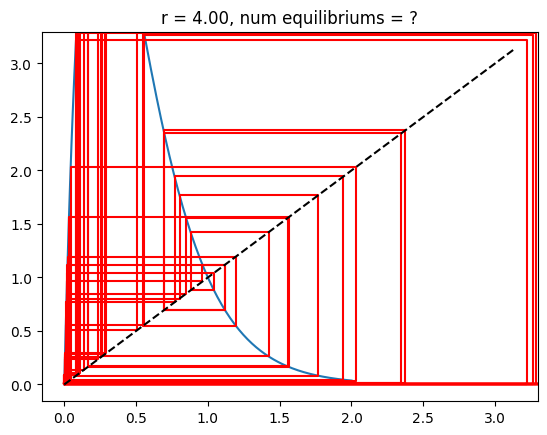

In [11]:
fig = plt.figure()
ax = plt.axes()

line, = ax.plot([], [])
cobweb, = ax.plot([], [], 'r-', ms=1)
ax.plot([0,3.14], [0,3.14], 'k--')
rs = np.linspace(0, 4, 200)

def init():
    line.set_data([], [])
    cobweb.set_data([], [])
    return line, cobweb

def animate(r):
    x = 0.1
    cobweb_x = []
    cobweb_y = []
    for _ in range(100):
        y = ricker(x, r, k)
        cobweb_x.extend([x, x, y])
        cobweb_y.extend([x, y, y])
        x = y
    cobweb.set_data(cobweb_x, cobweb_y)
    
    xs = np.linspace(0, 2, 200)
    ys = ricker(xs, r, k)
    tonyHawk = run(ricker, 0.1, 100, (r,k))[-10:]
    ax.set_title(f"r = {r:.2f}, num equilibriums = {detect_period(tonyHawk)}")

    line.set_data(xs, ys)
    return line, cobweb

anim = FuncAnimation(fig, animate, init_func=init, frames=rs, blit=True)

anim.save("cobweb_ricker.gif", writer=writer)
